<a href="https://colab.research.google.com/github/WFBlackRamyeon/Audero-MD5-Rainbow-Table/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

찾아낸 가중치 (a, b): -0.4178272485733032, 0.005177133250981569


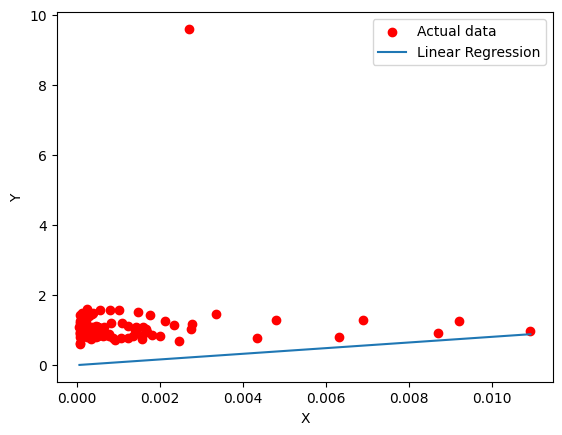

In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

df = pd.read_csv('dataset.csv')


x_data = df.iloc[:, 4].values.reshape(-1, 1)
y_data = df.iloc[:, 1].values.reshape(-1, 1)
k_data = df.iloc[:, 3].values.reshape(-1, 1)


model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=1)
])


model.compile(optimizer='sgd', loss='mean_squared_error')

input_data = np.hstack((x_data, y_data))

model.fit(input_data, k_data, epochs=1000, verbose=0)

weights = model.get_weights()[0]
a_pred, b_pred = weights.flatten()

print(f'찾아낸 가중치 (a, b): {a_pred}, {b_pred}')


plt.scatter(x_data, y_data, c='r', marker='o', label='Actual data')
plt.xlabel('X')
plt.ylabel('Y')

xx = np.linspace(x_data.min(), x_data.max(), 100)
yy = (-a_pred / b_pred) * xx
plt.plot(xx, yy, '-', label='Linear Regression')

plt.legend()
plt.show()
